In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Introduction to machine learning DEMOS 

In [16]:
bike = pd.read_csv("daily-bike-share.csv")

In [17]:
X = bike.drop('rentals', axis=1)
y = bike['rentals']

In [18]:
categorical_features = ['season', 'holiday', 'weekday', 'workingday', 'weathersit']
numerical_features = ['temp', 'atemp', 'hum', 'windspeed']

In [19]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Standard scaling for numerical features
        ('cat', OneHotEncoder(), categorical_features)  # One-hot encoding for categorical features
    ]
)

In [20]:
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
svr = SVR()


In [21]:
voting_regressor = VotingRegressor(
    estimators=[
        ('lr', lr),
        ('rf', rf),
        ('gbr', gbr),
        ('svr', svr)
    ]
)

In [22]:
model_pipeline = Pipeline(steps=[
    ('regressor', voting_regressor)
])


In [23]:
X = bike.drop('rentals', axis=1)
y = bike['rentals']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_pipeline.fit(X_train, y_train)

y_pred = model_pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'Root Mean Squared Error (RMSE): {rmse}')

cv_scores = cross_val_score(model_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = (-cv_scores) ** 0.5

print(f'Cross-validated RMSE: {cv_rmse_scores.mean()}')


Root Mean Squared Error (RMSE): 303.20990821424886
Cross-validated RMSE: 359.3922451662687


     Actual Rentals  Predicted Rentals
703             551         738.813718
33               61         181.219903
300             456         357.574149
456            2347        1067.832650
633             845         882.957485
557             975        1042.811804
39               53         113.707030
356             163         460.612275
559            1511        1273.455093
514             880         972.822145


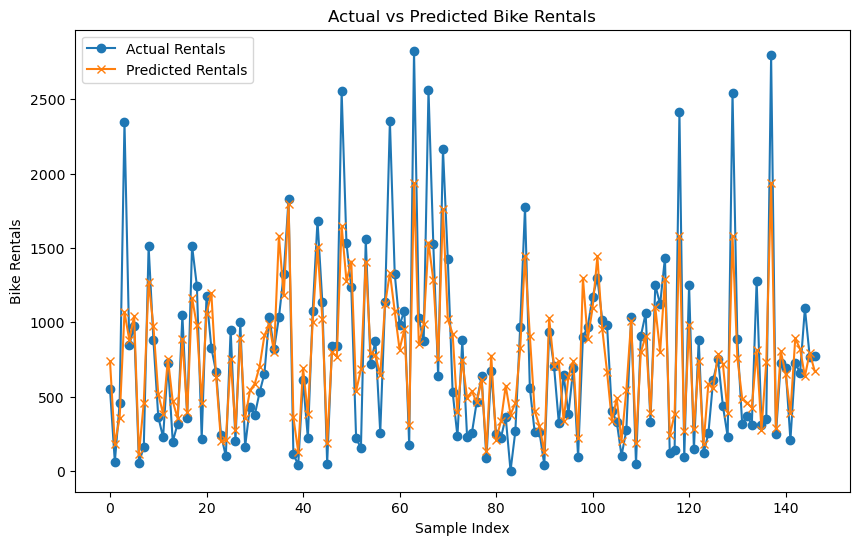

In [24]:
predicted_vs_actual = pd.DataFrame({
    'Actual Rentals': y_test,
    'Predicted Rentals': y_pred
})

# Display the first 10 rows for comparison
print(predicted_vs_actual.head(10))

# Optionally, you could also plot the results to visualize the comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(predicted_vs_actual['Actual Rentals'].values, label='Actual Rentals', marker='o')
plt.plot(predicted_vs_actual['Predicted Rentals'].values, label='Predicted Rentals', marker='x')
plt.title('Actual vs Predicted Bike Rentals')
plt.xlabel('Sample Index')
plt.ylabel('Bike Rentals')
plt.legend()
plt.show()


In [26]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 330.3 kB/s eta 0:06:19
   ---------------------------------------- 0.0/124.9 MB 393.8 kB/s eta 0:05:18
   ---------------------------------------- 0.1/124.9 MB 901.1 kB/s eta 0:02:19
   ---------------------------------------- 0.3/124.9 MB 1.4 MB/s eta 0:01:28
   ---------------------------------------- 0.4/124.9 MB 1.9 MB/s eta 0:01:07
   ---------------------------------------- 0.6/124.9 MB 2.2 MB/s eta 0:00:58
   ---------------------------------------- 0.7/124.9 MB 2.4 MB/s eta 0:00:53
   ---------------------------------------- 0.8/124.9 MB 2.5 MB/s eta 0:00:50
   ---------------------------------------- 1.0/124.9 MB 2.5 MB/s eta 0:00:50
   ---------------------------------------- 1.2/124.9 MB 2.8 MB/s eta 0:00:45
   ---------------------------------------- 1.4/124.9 MB 2.9 MB/s eta 0:

In [28]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Splitting the dataset into features (X) and target (y)
X = bike.drop('rentals', axis=1)
y = bike['rentals']

# Preprocessing: Identifying categorical and numerical features
categorical_features = ['season', 'holiday', 'weekday', 'workingday', 'weathersit']
numerical_features = ['temp', 'atemp', 'hum', 'windspeed']

# Preprocessing: One-hot encode categorical features and scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform the data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Define and train XGBoost regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train_transformed, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_transformed)

# Evaluate the model
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
print(f'XGBoost RMSE: {rmse_xgb}')

# Display predicted vs actual values
predicted_vs_actual_xgb = pd.DataFrame({
    'Actual Rentals': y_test,
    'Predicted Rentals': y_pred_xgb
})
print(predicted_vs_actual_xgb.head())


XGBoost RMSE: 329.9458287939036
     Actual Rentals  Predicted Rentals
703             551         705.198608
33               61          71.299347
300             456         429.208954
456            2347        1173.299438
633             845         884.904297


In [29]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Create a grid search
grid_search = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror'),
                           param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)

# Fit the model
grid_search.fit(X_train_transformed, y_train)

# Get the best parameters and retrain the model
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Retrain the model with best parameters
xgb_best = xgb.XGBRegressor(objective='reg:squarederror', **best_params)
xgb_best.fit(X_train_transformed, y_train)

# Make predictions and evaluate
y_pred_best = xgb_best.predict(X_test_transformed)
rmse_best = mean_squared_error(y_test, y_pred_best, squared=False)
print(f'XGBoost (Tuned) RMSE: {rmse_best}')


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters found:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
XGBoost (Tuned) RMSE: 291.26305619983003


In [30]:
titanic = pd.read_csv('titanic.csv')

In [31]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [33]:
fish = pd.read_csv('fish_data.csv')

In [34]:
fish

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31
...,...,...,...,...
4075,Sillaginopsis panijus,30.56,6.12,0.20
4076,Sillaginopsis panijus,29.66,6.11,0.21
4077,Sillaginopsis panijus,32.81,6.25,0.19
4078,Sillaginopsis panijus,29.78,6.11,0.21


In [35]:
fish.dtypes

species       object
length       float64
weight       float64
w_l_ratio    float64
dtype: object

In [39]:
fish.isna().sum()

species      0
length       0
weight       0
w_l_ratio    0
dtype: int64

In [44]:
fish.columns

Index(['species', 'length', 'weight', 'w_l_ratio'], dtype='object')

In [50]:
fish.duplicated().

0       False
1       False
2       False
3       False
4       False
        ...  
4075    False
4076    False
4077    False
4078     True
4079    False
Length: 4080, dtype: bool

In [51]:
# Check for duplicate rows in the dataset
duplicates = fish[fish.duplicated()]

# Display the duplicate rows, if any
print(f"Number of duplicate rows: {len(duplicates)}")
print(duplicates)


Number of duplicate rows: 109
                    species  length  weight  w_l_ratio
50       Anabas testudineus    8.17    3.30       0.40
84       Anabas testudineus    8.31    3.35       0.40
86       Anabas testudineus    7.23    3.31       0.46
204      Anabas testudineus    7.02    3.25       0.46
315      Anabas testudineus    8.98    3.26       0.36
...                     ...     ...     ...        ...
4025  Sillaginopsis panijus   29.54    6.11       0.21
4029  Sillaginopsis panijus   31.44    6.14       0.20
4036  Sillaginopsis panijus   31.17    6.17       0.20
4069  Sillaginopsis panijus   29.28    6.10       0.21
4078  Sillaginopsis panijus   29.78    6.11       0.21

[109 rows x 4 columns]


In [57]:
data_no_duplicate = fish.drop_duplicates()

In [58]:
data_no_duplicate

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31
...,...,...,...,...
4074,Sillaginopsis panijus,30.61,6.08,0.20
4075,Sillaginopsis panijus,30.56,6.12,0.20
4076,Sillaginopsis panijus,29.66,6.11,0.21
4077,Sillaginopsis panijus,32.81,6.25,0.19


In [66]:
data_no_duplicate.reset_index(drop=True, inplace=True)

In [67]:
data_no_duplicate

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31
...,...,...,...,...
3966,Sillaginopsis panijus,30.61,6.08,0.20
3967,Sillaginopsis panijus,30.56,6.12,0.20
3968,Sillaginopsis panijus,29.66,6.11,0.21
3969,Sillaginopsis panijus,32.81,6.25,0.19


In [68]:
data_no_duplicate.to_csv('cleaned_fish_data.csv', index=False)

In [70]:
google = pd.read_csv("google_review_ratings.csv")

In [71]:
google

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
1,User 2,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
2,User 3,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
3,User 4,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
4,User 5,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,User 5452,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,...,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56,NaN
5452,User 5453,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,...,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09,NaN
5453,User 5454,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,...,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11,NaN
5454,User 5455,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,...,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12,NaN


C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ACER\AppData\Local\Temp\ipykernel_2212\942523529.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grey_pixels['Cluster'] = kmeans.fit_predict(xy_coords)


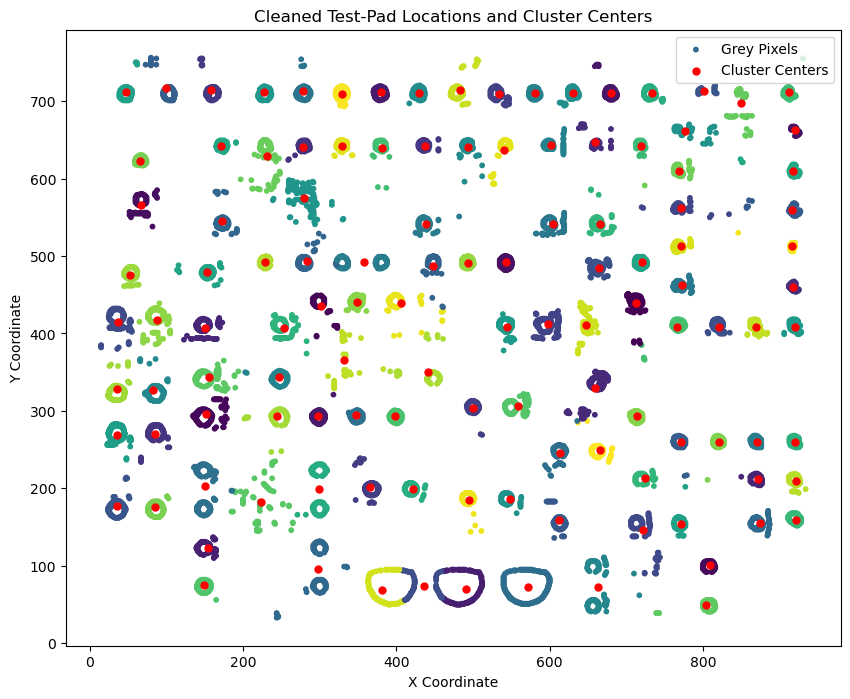

,X,Y
Cluster,,
0,712.819672,438.781421
1,301.547170,435.603774
2,151.723404,295.453901
3,809.000000,100.438596
4,67.570000,566.130000


In [69]:
# Re-importing required libraries since the context was lost
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Load the CSV file to inspect its contents
csv_file_path = 'TestPad_PCB_XYRGB_V2.csv'
data = pd.read_csv(csv_file_path)

# Step 2: Filter out grey pixels (where the 'Grey' column equals 1)
grey_pixels = data[data['Grey'] == 1]

# Step 3: Extract the X and Y coordinates of the grey pixels for clustering
xy_coords = grey_pixels[['X', 'Y']]

# Step 4: Apply K-Means clustering (using 120 clusters)
kmeans = KMeans(n_clusters=120, random_state=42)
grey_pixels['Cluster'] = kmeans.fit_predict(xy_coords)

# Step 5: Remove clusters with fewer than 10 pixels
cluster_counts = grey_pixels['Cluster'].value_counts()
valid_clusters = cluster_counts[cluster_counts >= 10].index

# Filter out clusters with fewer than 10 points
filtered_grey_pixels = grey_pixels[grey_pixels['Cluster'].isin(valid_clusters)]

# Step 6: Compute the center of each cluster (mean X and Y values)
cluster_centers = filtered_grey_pixels.groupby('Cluster')[['X', 'Y']].mean()

# Step 7: Visualize the cleaned clusters and their centers
plt.figure(figsize=(10, 8))

# Plot the remaining grey pixels
plt.scatter(filtered_grey_pixels['X'], filtered_grey_pixels['Y'], 
            c=filtered_grey_pixels['Cluster'], cmap='viridis', s=10, label='Grey Pixels')

# Plot the cluster centers
plt.scatter(cluster_centers['X'], cluster_centers['Y'], c='red', s=25, label='Cluster Centers')

plt.title("Cleaned Test-Pad Locations and Cluster Centers")
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.show()

cluster_centers.head()

### PLAN 1 MAKE THE PCB PROJECT IF ITS ELIGABLE TO THE CRITERIA